# Análisis de datos de radiación

## Questions

- ¿Cómo puedo procesar archivos de datos tabulares en Python?
- ¿Cómo lo puedo visualizar?


## Objetivos

- Explicar qué es una biblioteca y para qué se usan las bibliotecas.
- Importar una biblioteca Python y utilizar las funciones que contiene.
- Leer los datos de la tabla de un archivo en un programa.
- Crear algunas visualizaciones simples

Las palabras son útiles, pero lo que es más útil son las oraciones e historias que construimos con ellas. Del mismo modo, mientras que muchas herramientas generales y poderosas están incorporadas en Python, las herramientas especializadas construidas a partir de estas unidades básicas viven en bibliotecas a las que se puede recurrir cuando sea necesario.

# Cargando datos en Python

Un cliente nos ha encargado producir un script Python para resolver su problema.

- Tienen muchos datos experimentales y están usando nuestro software para simularlos. 
- Necesitan una forma rápida de comparar los resultados de los dos
    - Visualmente 
    - Estadísticamente
- Los datos se presentan en dos ficheros de texto

El experimento registra el resplandor de 5 ledes a través de una fina película de material. 

![experimental setup](./media/experiment_diagram.png)

Los datos experimentales están en la forma de la luminosidad de la luz 2 cm de la película delgada a lo largo de una sección transversal paralela a la línea de ledes. Como tal, los datos son de 1 dimensión y se ven así:

```
-2.475000000000000000e+01,1.128873340482146523e+04
-2.425450450450450290e+01,1.284396916618381510e+04
-2.375900900900900936e+01,8.733082162148733914e+03
-2.326351351351351227e+01,9.284282130758650965e+03
-2.276801801801801872e+01,9.719983197189985731e+03
-2.227252252252252163e+01,1.266916213215544485e+04
-2.177702702702702808e+01,1.256256575563995466e+04
-2.128153153153153099e+01,1.097440849516750131e+04
-2.078603603603603744e+01,1.198146183712815400e+04
```

la primera columna es la posición horizontal y la segunda es la luminosidad en Candela por metro cuadrado (una medida de luminancia).

Para comenzar a procesar los datos, necesitamos cargarlos en Python. Podemos hacerlo usando una biblioteca llamada [NumPy](https://numpy.org/), que significa Python numérico. Para decirle a Python que nos gustaría empezar a usar NumPy, necesitamos importarlo.

In [10]:
import numpy

Importar una biblioteca es como sacar un equipo de laboratorio de un armario de almacenamiento y ponerlo en el banco. Las bibliotecas proporcionan funcionalidad adicional al paquete básico de Python, al igual que una nueva pieza de equipo agrega funcionalidad a un espacio de laboratorio. Al igual que en el laboratorio, importar demasiadas bibliotecas a veces puede complicar y ralentizar sus programas - por lo que solo importa lo que necesitamos para cada programa.

Una vez que hayamos importado la biblioteca, podemos pedirle a la biblioteca que lea nuestro archivo de datos por nosotros:

In [11]:
numpy.loadtxt(fname='experiment01.csv', delimiter=',')

array([[-2.47500000e+01,  1.12887334e+04],
       [-2.42545045e+01,  1.28439692e+04],
       [-2.37590090e+01,  8.73308216e+03],
       [-2.32635135e+01,  9.28428213e+03],
       [-2.27680180e+01,  9.71998320e+03],
       [-2.22725225e+01,  1.26691621e+04],
       [-2.17770270e+01,  1.25625658e+04],
       [-2.12815315e+01,  1.09744085e+04],
       [-2.07860360e+01,  1.19814618e+04],
       [-2.02905405e+01,  1.80491245e+04],
       [-1.97950450e+01,  1.44574182e+04],
       [-1.92995495e+01,  1.89761845e+04],
       [-1.88040541e+01,  2.08202613e+04],
       [-1.83085586e+01,  2.33232490e+04],
       [-1.78130631e+01,  2.31820626e+04],
       [-1.73175676e+01,  3.19741050e+04],
       [-1.68220721e+01,  2.64591704e+04],
       [-1.63265766e+01,  3.60125238e+04],
       [-1.58310811e+01,  3.65891726e+04],
       [-1.53355856e+01,  3.50759625e+04],
       [-1.48400901e+01,  4.77579559e+04],
       [-1.43445946e+01,  5.04921924e+04],
       [-1.38490991e+01,  6.99626661e+04],
       [-1.

La expresión `numpy.loadtxt(...)` es una llamada a una función que le pide a Python que ejecute la función `loadtxt`, que pertenece a la biblioteca numpy. Esta notación punteada se usa en todas partes en Python: la cosa que aparece antes del punto contiene la cosa que aparece después.

Como ejemplo, John Smith es el John que pertenece a la familia Smith. Podríamos usar la notación de puntos para escribir su nombre smith.john, así como `loadtxt` es una función que pertenece a la biblioteca numpy.

`numpy.loadtxt` tiene dos argumentos: el nombre del archivo que queremos leer y el delimitador que separa valores en una línea. Ambos necesitan ser cadenas de caracteres (o cadenas cortas), así que los ponemos entre comillas.

Como no le hemos dicho que haga nada más con la salida de la función, el cuaderno lo muestra. En este caso, esa salida son los datos que acabamos de cargar. Por defecto, solo se muestran unas pocas filas y columnas (con ... para omitir elementos al mostrar matrices grandes). Tenga en cuenta que, para ahorrar espacio al mostrar matrices NumPy, Python no nos muestra ceros finales, por lo que `1.0` se convierte en `1. `.

> **Nota sobre argumentos de palabras clave:** Puede que haya notado en la última sección que las funciones pueden tomar múltiples argumentos, pero que el orden es importante. Esto se debe a que cuando se definen funciones, generalmente se definen de tal manera que cada argumento tiene una variable específica. Por ejemplo, supongamos que usted tiene una función que calcula el IMC de una persona, en la definición se vería algo como esto `calculate_bmi(peso, altura)`. Los nombres utilizados en la definición se pueden usar cuando se llama a la función, de esta manera.
> Python
> h = 100.
> w = 80.
> bmi = calculador_bmi(altura=h, peso=w)
> El tiempo de trabajo
> Aquí estamos diciendo explícitamente que el argumento `altura` será la variable `h` y `w` para `peso`, y porque estamos siendo específicos sobre lo que va a ser lo que, el orden ya no importa! Cuando se proporcionan argumentos como este, usando `=`, se conocen como "*argumentos de palabras clave*" o *kwargs*, para abreviar.

Para el resto de este ejercicio, tenemos que guardar la salida de `loadtxt` en la memoria, asignarlo a una variable llamada `data` en la celda de abajo! `imprimirlo e inspeccionar los datos.

In [12]:
data = numpy.loadtxt(fname='experiment01.csv', delimiter=',')

A continuación, queremos interrogar a la variable de datos. ¿Qué tipo es? Utilice la función bulit-in `type` para averiguar y `imprimir` la salida!

In [13]:
print(type(data))

<class 'numpy.ndarray'>


La salida nos dice que los datos se refieren actualmente a una matriz N-dimensional, cuya funcionalidad es proporcionada por la biblioteca NumPy. 

> **Tipo de datos:**

 Una matriz Numpy contiene uno o más elementos del mismo tipo. La función type solo le dirá que una variable es una matriz NumPy pero no le dirá el tipo de cosa dentro de la matriz. Podemos averiguar el tipo de datos contenidos en el array NumPy.
> Python
> > imprimir (data.dtype)
> > float64
> El tiempo de trabajo
> Esto nos dice que los elementos de la matriz NumPy son números de punto flotante.

Las matrices NumPy tienen una propiedad importante llamada `shape` que nos permite ver la "forma" de la matriz.

In [14]:
data.shape

(100, 2)

`data` tiene 100 filas y 2 columnas. Cuando creamos el array (y lo almacenamos en la variable `data`) se encontraron y almacenaron como propiedades del array varias otras propiedades del array. Esta información adicional describe `data` de la misma manera que un adjetivo describe un sustantivo. `data.shape` es un atributo de `data` que describe las dimensiones de `data`. Usamos la misma notación punteada para las propiedades de las variables que usamos para las funciones en las bibliotecas porque tienen la misma relación de parte y todo.

## Acceder a elementos en una matriz

Los valores individuales en una matriz (o cualquier otra colección en Python) se conocen como *elements*.

Si queremos obtener un solo número de la matriz, debemos proporcionar un *index* entre corchetes después del nombre de la variable, al igual que hacemos en matemáticas cuando nos referimos a un elemento de una matriz. Nuestros datos tienen dos dimensiones, por lo que necesitaremos usar dos índices para referirnos a un valor específico:

In [7]:
print('first value in data:', data[0, 0])

first value in data: -24.75


In [8]:
print('middle value in data:', data[50, 1])

middle value in data: 318085.27594024554


La expresión `data[50, 0]` accede al elemento de la fila 50, columna 1. Si bien esta expresión puede no sorprenderle, `data[0, 0]` podría. Los lenguajes de programación como Fortran, MATLAB y R empiezan a contar a 1 porque eso es lo que los seres humanos han hecho durante miles de años. Los lenguajes en la familia C (incluyendo C++, Java, Perl, y Python) cuentan desde 0 porque representa un desplazamiento del primer valor en el array (el segundo valor es compensado por un índice del primer valor). Esto está más cerca de la forma en que las computadoras representan matrices. Como resultado, si tenemos una matriz M N en Python, sus índices van de 0 a M-1 en el primer eje y de 0 a N-1 en el segundo. Se necesita un poco de acostumbrarse, pero una manera de recordar la regla es que son como coordenadas: 0 cm/ in es la primera medida en una regla, y 1 cm/ in es la segunda, y así sucesivamente.

![demostración de indexación](media/python-zero-index.svg)

> **Nota:** Lo que también puede sorprenderle es que cuando Python muestra una matriz, muestra el elemento con índice `[0, 0]` en la esquina superior izquierda en lugar de la esquina inferior izquierda. Esto es consistente con la forma en que los matemáticos dibujan matrices pero diferente de las coordenadas cartesianas. Los índices son (fila, columna) en lugar de (columna, fila) por la misma razón, lo que puede ser confuso al trazar datos.

# Slicing Data

Un índice como `[30, 20]` selecciona un solo elemento de una matriz, pero también podemos seleccionar secciones enteras. Por ejemplo, podemos seleccionar las primeras diez filas de valores como esta.

In [9]:
print(data[0:10, 0:2])

[[  -24.75       11288.73340482]
 [  -24.2545045  12843.96916618]
 [  -23.75900901  8733.08216215]
 [  -23.26351351  9284.28213076]
 [  -22.76801802  9719.98319719]
 [  -22.27252252 12669.16213216]
 [  -21.77702703 12562.56575564]
 [  -21.28153153 10974.40849517]
 [  -20.78603604 11981.46183713]
 [  -20.29054054 18049.12449399]]


La rebanada `0:10` significa, "Comienza en el índice 0 y sube a, pero no incluye el índice 10". Una vez más, el up-to-but-not-including toma un poco de acostumbrarse, pero la regla es que la diferencia entre los límites superior e inferior es el número de valores en la rebanada.

No tenemos que empezar a cortar a 0:

In [10]:
print(data[5:10, 0:2])

[[  -22.27252252 12669.16213216]
 [  -21.77702703 12562.56575564]
 [  -21.28153153 10974.40849517]
 [  -20.78603604 11981.46183713]
 [  -20.29054054 18049.12449399]]


Tampoco tenemos que incluir el límite superior e inferior en la rebanada. Si no incluimos el límite inferior, Python usa `0` por defecto; si no incluimos el superior, la rebanada se ejecuta hasta el final del eje, y si no incluimos ninguna de las dos (es decir, si usamos '`:`' por sí sola), la rebanada incluye todo:

In [11]:
small = data[:3, :1]
print('small is:')
print(small)

small is:
[[-24.75      ]
 [-24.2545045 ]
 [-23.75900901]]


# Visualización de datos

Ahora hemos analizado los datos experimentales, pero no es muy obvio lo que estamos viendo. ¡Visualicémoslo como una trama! 

Si bien no hay una biblioteca oficial de trazado, `matplotlib` es el estándar de facto en Python. Primero, importaremos el módulo `pyplot` de `matplotlib` y lo usaremos para crear y mostrar un gráfico de línea simple de nuestros datos. 

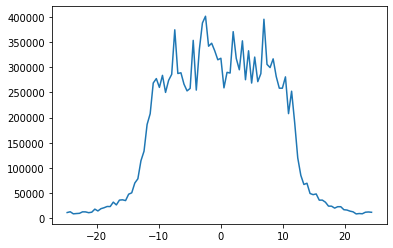

In [4]:
import matplotlib.pyplot as plt

plt.plot(data[:,0], data[:,1])

> **Nota:** 

Como veremos más adelante, hay comandos adicionales que normalmente se requieren para hacer diagramas matplotlib, sin embargo, ¡los cuadernos jupyter han simplificado el proceso, de modo que solo necesitamos trazar los datos para que aparezcan! A medida que desarrollemos tramas más avanzadas presentaremos estos otros comandos.

¡Esto es muy poderoso!

Echemos un vistazo a nuestros datos de simulación en `simulation01.txt`. Es muy diferente!

```
2
2
1
1
-25.0000000000	25.0000000000	-10.0000000000	10.0000000000
100	40
-1
SeparatedByLayer 1	1	1	
All Sources
6859.3959960938	6833.2480468750	23.2004756927	8504.5800781250	6948.3168945313	7660.0200195313	24.023168563

...

9249.9072265625	28.7107124329	8983.6347656250	8642.8007812500	9405.1074218750	27.9149532318	8245.5605468750	


X	Y	Value
-24.75	-9.75	7075.5429687500	
-24.25	-9.75	6839.1616210938	
-23.75	-9.75	7959.0229492188	
-23.25	-9.75	8201.9765625000	
-22.75	-9.75	7176.8256835938	
-22.25	-9.75	7260.2070312500	
-21.75	-9.75	8004.4028320313	
-21.25	-9.75	9858.7236328125	
```

Lo primero que hay que notar es que no se inicia correctamente hasta la línea 53, y que los datos tienen valores x *y* y para la posición! Para leer estos datos, necesitamos saltar las filas hasta este punto. Afortunadamente `loadtxt` tiene un parámetro opcional que podemos usar: `skiprows`. Esto le dice a la función que omita cuantas filas le pidamos, antes de analizar los datos. Finalmente, también podemos omitir el argumento `delimiter` esta vez porque el delimitador es el espacio en blanco en este archivo, que es el predeterminado para `loadtxt`.

In [1]:
import numpy
import matplotlib.pyplot as plt
sim = numpy.loadtxt(fname='simulation01.txt', skiprows=52)
sim

array([[-2.47500000e+01, -9.75000000e+00,  7.07554297e+03],
       [-2.42500000e+01, -9.75000000e+00,  6.83916162e+03],
       [-2.37500000e+01, -9.75000000e+00,  7.95902295e+03],
       ...,
       [ 2.37500000e+01,  9.75000000e+00,  9.83051758e+03],
       [ 2.42500000e+01,  9.75000000e+00,  9.94980859e+03],
       [ 2.47500000e+01,  9.75000000e+00,  9.72091992e+03]])

Pero, ¿cómo se ven estos datos? Tenemos coordenadas y un valor en cada punto. Podemos utilizar otra función de trazado, para visualizar los datos rápida y fácilmente, llamada `scatter`.

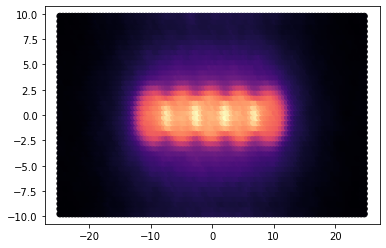

In [9]:
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]
plt.scatter(x, y, c=rad, cmap='magma')



¡Podemos ver que tenemos todo un campo de visión! Esto revela algunos problemas.

- Necesitamos una sección transversal para comparar con los datos experimentales
- La trama parece un poco deformada (la [relación de aspecto] (https:/matplotlib.org/stable/api/_as_gen/matplotlib.axes.set_aspect.html) no se establece en 1 en la trama)
- Todavía tenemos que etiquetar ambas parcelas

Para hacer frente a estos problemas debemos desarrollar nuestras habilidades de pitón más! 

## Ejercicio 1* - Cortar cadenas

El corte se puede realizar en múltiples objetos de secuencia en Python. Notablemente, esto incluye cadenas!

Tome la siguiente cadena.

In [2]:
string = 'experiment01.csv'


1. ¿Cuál es el valor de `string[:4]` ¿Qué hay de `string[4:]`? O `string[:]`?
1. ¿Qué es `string[-1]`? ¿Qué es `string[-2]`?
1. Dadas esas respuestas, explique qué hace la `cadena[1:-1]` .

¿Cómo podemos reescribir la rebanada para obtener los últimos tres caracteres de `string`, de modo que funcione incluso si asignamos una cadena diferente a `string`? Pruebe su solución con las siguientes cadenas: `carpentry`, `clone`, `hi`.

In [3]:
string[:4]

'expe'

In [4]:
string[4:]

'riment01.csv'

In [5]:
string[:]

'experiment01.csv'

In [6]:
string[-1]

'v'

In [7]:
string[-2]

's'

In [8]:
string[1:-1]

'xperiment01.cs'

Ejercicio 2 - Cortes delgados

La expresión `string[3:3]` produce una cadena vacía, es decir, una cadena que no contiene caracteres. Si `data` contiene la matriz de datos de radiación que asignamos anteriormente en la lección, ¿qué producen los `datos[3:3, 1:1]` ? ¿Qué ocurre con los `datos[3:3, :]`?

In [9]:
string[3:3]

''

In [18]:
import numpy


data = numpy.loadtxt(fname='simulation01.txt',skiprows=52)


# Ejercicio 3 - Figuras matplotlib

Normalmente cuando se trabaja con matplotlib (es decir, fuera de los cuadernos jupyter) antes de que pueda trazar cualquier cosa que necesita para crear una "figura". Luego agregas "hachas" a la figura y solo entonces puedes trazar cosas en los ejes.

Cuando cree algunos ejes, debe agregar una subtrama a la figura. Esto requiere especificar 3 dígitos.

```
fig = plt.figure()
ejes = fig.add_subplot(312)
```

Estos indican cuántas subtramas se van a crear y qué conjunto de ejes es esta subtrama. El comando `add_subplot(312)` significa: 

"habrá **3** filas por **1** columna,  de las subparcelas, y esta subparcela es la **2**nd una".

Cree una nueva figura y añada 6 subtramas en una disposición de 3 x 2. Llame a cada eje añadido ax1, ax2, ax3, ... , axN. Ejecute la celda después de hacer cada nuevo eje, y anote el orden con el que se crean los ejes.

> Nota: `fig.add_subplot(312)` es equivalente a `fig.add_subplot(3, 1, 2)`; las comas a menudo se omiten como una forma de taquigrafía, sin embargo, se requieren si se desea usar una variable o un entero de dos dígitos. Por ejemplo, hacer una cuadrícula de 10 x 3 ejes `fig.add_subplot(1031)` no es válida, pero `fig.add_subplot(10, 3, 1)` no lo es!

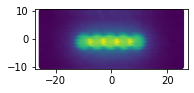

In [35]:
import matplotlib.pyplot as plt
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
fig = plt.figure()
axes = fig.add_subplot(3, 2, 2)
axes.scatter(x,y,c=z)
axes.set_aspect(1)

# Ejercicio 4* - Trabajar con matrices

En la celda de abajo he creado una matriz de unos en forma de 3 x 3. ¿Qué pasa si...

- ¿Multiplicas la matriz por 10?
- ¿Entonces resta 5 de la matriz?
- Finalmente, ¿divides la matriz por 5?

In [23]:
import numpy

ones = numpy.ones((3, 3))
# Enter your solution here

mul_10 = ones * 10
mul_10

array([[10., 10., 10.],
       [10., 10., 10.],
       [10., 10., 10.]])

En la siguiente celda creamos una nueva matriz llamada `twos`, que también es 3 x 3, pero cada elemento es igual a `2`.

- ¿Qué pasa si añadimos `ones` a `twos`?
- ¿Si los multiplicamos juntos?
- ¿Si dividimos `unos` por `dos por dos?

In [6]:
import numpy

twos = numpy.ones((3, 3)) + 1
# Enter your solution here

Finalmente, creamos una nueva matriz `tres` que es 5 x 5. Si añadimos/restamos/multiplicamos/dividimos `unos` a/de/por `tres` ¿qué sucede? ¿Y por qué?

In [13]:
import numpy

threes = numpy.ones((5, 5))*3
# Enter your solution here

Puntos clave

- Importar una biblioteca en un programa usando `import libraryname`.
- Utilice la biblioteca `numpy` para trabajar con matrices en Python.
- Utilice `array[x, y]` para seleccionar un solo elemento de una matriz 2D.
- Los índices de matriz comienzan en 0, no en 1.
- Utilizar `bajo:alto` para especificar una porción que incluya los índices de `bajo` a `alto-1`.
- Utilice el módulo `pyplot` de la biblioteca `matplotlib` para crear visualizaciones simples.

